# Libraries and Dates

In [1]:
#Install Libraries
! pip install yfinance tfcausalimpact

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 2.3 MB/s eta 0:00:00


In [2]:
#Import Libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
#Define Dates
training_start = '2020-09-01'
training_end = '2020-10-19'
treatment_start = '2020-10-20'
treatment_end = '2020-10-23'
end_stock = '2020-10-24'

# Loading Financial Data

In [4]:
#Bitcoin Data
y = ['BTC-USD']
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = '1d')
y = y['Adj Close'].rename('y')
y[:1]

[*********************100%%**********************]  1 of 1 completed


Date
2020-09-01    11970.478516
Name: y, dtype: float64

In [5]:
 #Load more Stock Data
stocks = ['CARL-B.CO', 'ZAL.DE', 'SQ', 'CRSP', 'TRMB', 'JD', 'DE', 'KTOS', 'GOOGL']
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = '1d')
X.head()

[*********************100%%**********************]  9 of 9 completed


Adj Close                                               \
             CARL-B.CO       CRSP          DE      GOOGL         JD   
Date                                                                  
2020-09-01  794.451111  93.419998  210.029648  82.753998  79.267685   
2020-09-02  802.765198  93.930000  209.470078  85.869499  79.959564   
2020-09-03  818.099915  85.690002  203.391769  81.475502  75.952454   
2020-09-04  804.612732  82.019997  203.903107  79.060501  76.874954   
2020-09-07  812.926697        NaN         NaN        NaN        NaN   

                                                              Close  ...  \
                 KTOS          SQ       TRMB     ZAL.DE   CARL-B.CO  ...   
Date                                                                 ...   
2020-09-01  19.700001  166.660004  53.410000  77.000000  860.000000  ...   
2020-09-02  19.910000  162.880005  54.310001  77.000000  869.000000  ...   
2020-09-03  19.520000  152.860001  50.900002  75.080002  885.599976  ...   
2020-09-04  19.260000  146.389999  49.959999  71.739998  871.000000  ...   
2020-09-07        NaN         NaN        NaN  74.000000  880.000000  ...   

                 Open    Volume                                                \
               ZAL.DE CARL-B.CO       CRSP         DE       GOOGL          JD   
Date                                                                            
2020-09-01  74.959999    269532   779500.0  1873400.0  22652000.0  11431400.0   
2020-09-02  77.500000    202539   532000.0  1983000.0  49522000.0  13860900.0   
2020-09-03  77.260002    248867  1278900.0  1975200.0  63726000.0  19254000.0   
2020-09-04  74.800003    221091  1570300.0  1662300.0  55850000.0  21500900.0   
2020-09-07  72.239998     90498        NaN        NaN         NaN         NaN   

                                                      
                 KTOS          SQ       TRMB  ZAL.DE  
Date                                                  
2020-09-01   587600.0  12306400.0   542300.0  790198  
2020-09-02   612800.0  11214800.0   728800.0  496554  
2020-09-03   847100.0  16421200.0  1220300.0  736259  
2020-09-04  1060000.0  17995200.0   914700.0  662250  
2020-09-07        NaN         NaN        NaN  362062  

[5 rows x 54 columns]

In [6]:
#Getting just the Adjusted Close
X = X.iloc[:, :len(stocks)]
X.head()

Adj Close                                               \
             CARL-B.CO       CRSP          DE      GOOGL         JD   
Date                                                                  
2020-09-01  794.451111  93.419998  210.029648  82.753998  79.267685   
2020-09-02  802.765198  93.930000  209.470078  85.869499  79.959564   
2020-09-03  818.099915  85.690002  203.391769  81.475502  75.952454   
2020-09-04  804.612732  82.019997  203.903107  79.060501  76.874954   
2020-09-07  812.926697        NaN         NaN        NaN        NaN   

                                                         
                 KTOS          SQ       TRMB     ZAL.DE  
Date                                                     
2020-09-01  19.700001  166.660004  53.410000  77.000000  
2020-09-02  19.910000  162.880005  54.310001  77.000000  
2020-09-03  19.520000  152.860001  50.900002  75.080002  
2020-09-04  19.260000  146.389999  49.959999  71.739998  
2020-09-07        NaN         NaN        NaN  74.000000

In [7]:
#Removing Unneeded Level
X.columns = X.columns.droplevel()
X.head()

,CARL-B.CO,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,794.451111,93.419998,210.029648,82.753998,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,802.765198,93.930000,209.470078,85.869499,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,818.099915,85.690002,203.391769,81.475502,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,804.612732,82.019997,203.903107,79.060501,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-07,812.926697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


In [8]:
#Combine Everything
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,CARL-B.CO,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,794.451111,93.419998,210.029648,82.753998,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,802.765198,93.930000,209.470078,85.869499,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,818.099915,85.690002,203.391769,81.475502,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,804.612732,82.019997,203.903107,79.060501,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,799.439575,81.459999,202.841812,76.180000,73.242615,19.230000,139.110001,49.139999,73.440002


In [9]:
#Prepare DataFrame with only Training Data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-13,11425.899414,827.891968,103.059998,229.658981,78.353500,79.382996,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,822.718811,101.370003,230.869141,78.171997,77.931984,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,808.492615,99.889999,230.646469,77.773499,77.115181,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,801.656616,109.830002,232.408493,78.385002,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,804.427917,107.720001,230.578735,76.497498,77.461121,20.639999,186.960007,51.970001,85.000000


In [10]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)[1]
print(test)

if test < 0.05:
  print('The Time Series is stationary')
else:
  print('The Time Series is not stationary')

0.0987470320882271
The Time Series is not stationary


In [11]:
#Differencing
differencing = df_training.pct_change().dropna()
differencing.head()

#Stationarity

test = adfuller(x = differencing.y)[1]
print(test)

if test < 0.05:
  print('The Time Series is stationary')
else:
  print('The Time Series is not stationary')

3.8054323617260893e-07
The Time Series is stationary


<Axes: >

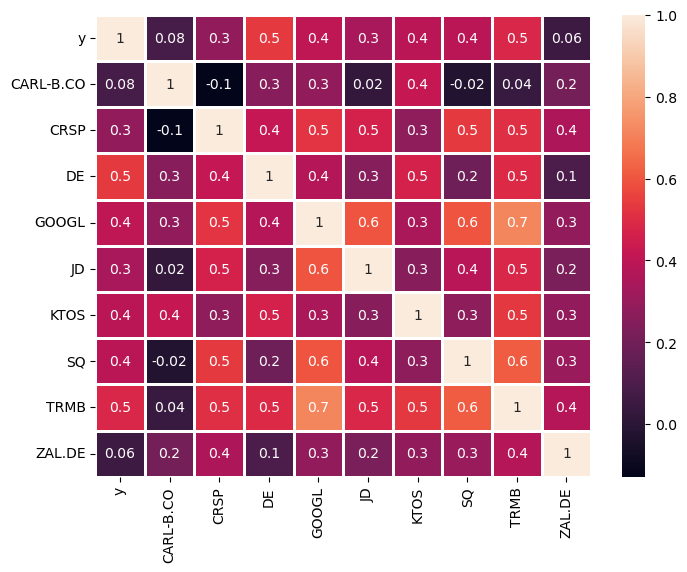

In [12]:
#Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            linewidths = 1,
            linecolor = 'white')

# Google Causal Impact

In [13]:
#Prepare the Dataset
df_final = df.drop(columns = ['CARL-B.CO', 'ZAL.DE'])
df_final.head()

,y,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.029648,82.753998,79.267685,19.700001,166.660004,53.410000
2020-09-02,11414.034180,93.930000,209.470078,85.869499,79.959564,19.910000,162.880005,54.310001
2020-09-03,10245.296875,85.690002,203.391769,81.475502,75.952454,19.520000,152.860001,50.900002
2020-09-04,10511.813477,82.019997,203.903107,79.060501,76.874954,19.260000,146.389999,49.959999
2020-09-08,10131.516602,81.459999,202.841812,76.180000,73.242615,19.230000,139.110001,49.139999


In [14]:
#Prepare pre and post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

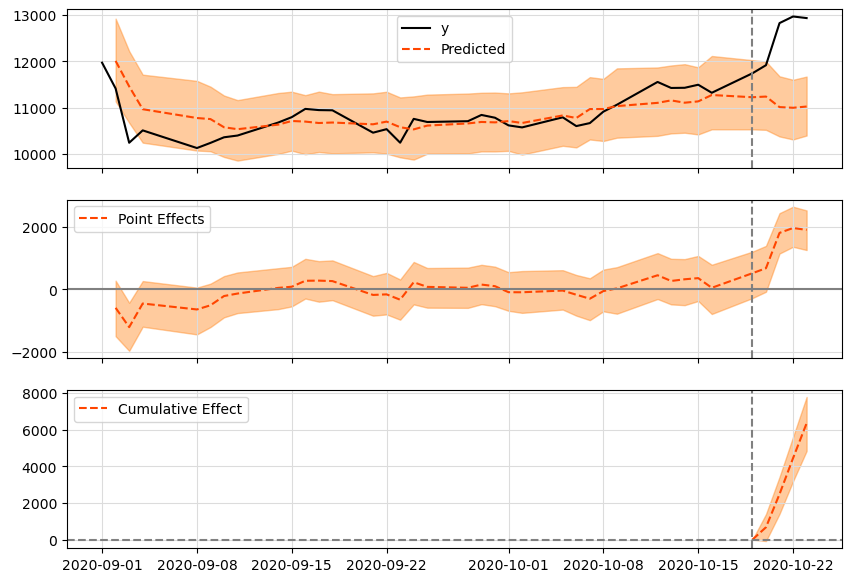

In [15]:
#Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [16]:
#Summary
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11069.65.
The 95% interval of this counterfactual prediction is [10709.19, 11474.46].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1589.71 with a 95% interval of
[1184.9, 1950.18]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44278.6. The 95% interval of this prediction is [42836.74, 45897.85].


The above results are given in terms of absolute numbers. In relative
te